In [ ]:
# using SQLite
using DataFrames
import XLSX 
using TableIO
using Plots 
using CSV

In [36]:

NWS = SQLite.DB("NWS.db")


SQLite.DB("NWS.db")

## SQL 
## Structured query language is designed for managing data held in a relational database management system

In [38]:
##* check all tables
NWS = SQLite.DB("NWS.db")
SQLite.tables(NWS)|>DataFrame 

,name,schema
,String,Schema
1,SoilRespiration,Tables.Schema:\n :DeepShallow Any\n :PlotID Any\n :Side Any\n :Samples Any\n :Warming Any\n :Precipitation Any\n :Clipping Any\n :MeasurementDate Any\n :SoilRespiration Any
2,SoilMoisture,Tables.Schema:\n :PlotID Any\n :Side Any\n :Warming Any\n :Precipitation Any\n :Clipping Any\n :Samples Any\n :MeasurementDate Any\n :Moisture1 Any\n :Moisture2 Any\n :Moisture3 Any
3,ANPP,Tables.Schema:\n :PlotID Any\n :Warming Any\n :Precipitation Any\n :FunctionalGroup Any\n :Year Any\n :Biomass Any
4,NEE,Tables.Schema:\n :PlotID Any\n :Side Any\n :Warming Any\n :Precipitation Any\n :Clipping Any\n :MeasurementDate Any\n :NEE Any


In [39]:
##* check all tables
SQLite.tables(NWS)

4-element Vector{SQLite.DBTable}:
 SQLite.DBTable("SoilRespiration", Tables.Schema:
 :DeepShallow      Any
 :PlotID           Any
 :Side             Any
 :Samples          Any
 :Warming          Any
 :Precipitation    Any
 :Clipping         Any
 :MeasurementDate  Any
 :SoilRespiration  Any)
 SQLite.DBTable("SoilMoisture", Tables.Schema:
 :PlotID           Any
 :Side             Any
 :Warming          Any
 :Precipitation    Any
 :Clipping         Any
 :Samples          Any
 :MeasurementDate  Any
 :Moisture1        Any
 :Moisture2        Any
 :Moisture3        Any)
 SQLite.DBTable("ANPP", Tables.Schema:
 :PlotID           Any
 :Warming          Any
 :Precipitation    Any
 :FunctionalGroup  Any
 :Year             Any
 :Biomass          Any)
 SQLite.DBTable("NEE", Tables.Schema:
 :PlotID           Any
 :Side             Any
 :Warming          Any
 :Precipitation    Any
 :Clipping         Any
 :MeasurementDate  Any
 :NEE              Any)

In [ ]:
## read in data as dataframe

df_SR   = DataFrame(XLSX.readtable("soil_respiration_2020_2021_2022.xlsx","Sheet1")...)
df_SM   = DataFrame(XLSX.readtable("soil_moisture_2020_2021_2022.xlsx","Sheet1")...)
# df_ST   = DataFrame(XLSX.readtable("soil_temperature.xlsx","Sheet1")...)
df_ANPP = DataFrame(XLSX.readtable("ANPP_clipped.xlsx","Sheet1")...)
# df_ER   = DataFrame(XLSX.readtable("ER.xlsx","Sheet1")...)
df_NEE  = DataFrame(XLSX.readtable("NEE.xlsx","Sheet1")...)
# df_PSC  = DataFrame(XLSX.readtable("plant_species.xlsx","Sheet1")...)


In [21]:
## writing dataframe into different tables 
## "SoilRespiration","SoilTemperature","SoilMoisture","ANPP","GPP","ER" etc


write_table!("NWS.db", "SoilRespiration", df_SR)
# write_table!("NWS.db", "SoilTemperature", df_ST)
write_table!("NWS.db", "SoilMoisture", df_SM)
write_table!("NWS.db", "ANPP", df_ANPP)
write_table!("NWS.db", "NEE", df_NEE)
# write_table!("NWS.db", "ER", df_ER)
# write_table!("NWS.db", "SpeciesComposition", df_PSC)


## View all columns in a table

In [40]:
q = "SELECT * FROM SoilRespiration"
df = DataFrame(SQLite.DBInterface.execute(NWS,q))
show(df,allcols=true)

1152×9 DataFrame
  Row │ DeepShallow  PlotID  Side    Samples  Warming  Precipitation  Clipping  MeasurementDate  SoilRespiration 
      │ String       Int64   String  String   String   String         String    Int64            Any             
──────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ d                 1  north   1nd      W        C              No               20200202  3.0
    2 │ s                 1  north   1ns      W        C              No               20200202  8.2
    3 │ d                 1  south   1sd      W        C              Yes              20200202  4.6
    4 │ s                 1  south   1ss      W        C              Yes              20200202  5.63
    5 │ d                 2  north   2nd      W        H              No               20200202  2.15
    6 │ s                 2  north   2ns      W        H              No               20200202  2.3
    7 │ d                 2  sout

In [106]:
q = "SELECT * FROM SoilMoisture"
df = DataFrame(SQLite.DBInterface.execute(NWS,q))
show(df,allcols=true)

480×10 DataFrame
 Row │ PlotID  Side    Warming  Precipitation  Clipping  Samples        MeasurementDate  Moisture1  Moisture2  Moisture3 
     │ Int64   String  String   String         String    String         Int64            Float64    Float64    Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │      1  north   W        C              No        X22_1N_H_N_1          20200202       19.9       16.9       20.3
   2 │      1  south   W        C              Yes       X22_1S_H_C_1          20200202       21.0       26.4       21.0
   3 │      2  north   W        H              No        X22_2N_H_N_0          20200202       15.6       17.8       19.6
   4 │      2  south   W        H              Yes       X22_2S_H_C_0          20200202       12.3       15.6       14.2
   5 │      3  north   C        C              No        X22_3N_N_N_1          20200202       20.3       23.6       21.4
   6 │      

## View selected columns in a table

In [109]:
q = "SELECT Warming, Precipitation, Moisture1
     FROM SoilMoisture"

DataFrame(SQLite.DBInterface.execute(NWS,
q))

# CSV.write("test1.csv", df)

,Warming,Precipitation,Moisture1
,String,String,Float64
1,W,C,19.9
2,W,C,21.0
3,W,H,15.6
4,W,H,12.3
5,C,C,20.3
6,C,C,22.5
7,W,D,23.2
8,W,D,17.8
9,W,H,18.1


## Filter data using multiple search condition

In [110]:
q = (
"SELECT * 
 FROM SoilMoisture 
 WHERE Warming = 'W' and
       Clipping = 'Yes' and 
       MeasurementDate >=20200500 and 
       MeasurementDate <=20200600 ")

df = DataFrame(SQLite.DBInterface.execute(NWS,q))
show(df,allcols=true)

# CSV.write("test1.csv", df)

12×10 DataFrame
 Row │ PlotID  Side    Warming  Precipitation  Clipping  Samples        MeasurementDate  Moisture1  Moisture2  Moisture3 
     │ Int64   String  String   String         String    String         Int64            Float64    Float64    Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │      1  south   W        C              Yes       X22_1S_H_C_1          20200520        8.9        7.3        9.5
   2 │      2  south   W        H              Yes       X22_2S_H_C_0          20200520       10.2       10.4        9.3
   3 │      4  south   W        D              Yes       X22_4S_H_C_2          20200520       15.1       13.1       11.8
   4 │      5  south   W        H              Yes       X22_5S_H_C_0          20200520       11.8        9.9        7.7
   5 │      7  south   W        D              Yes       X22_7S_H_C_2          20200520       12.4       14.3       10.6
   6 │     10

## Filter data using multiple search condition and plotting

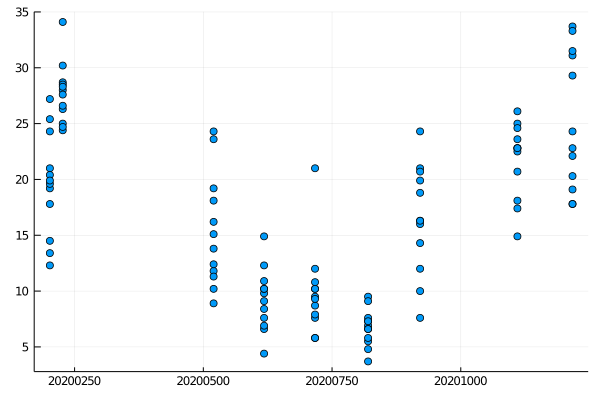

In [91]:
q = (
"SELECT MeasurementDate,Moisture1
 FROM SoilMoisture 
 WHERE Warming = 'W' and
       Clipping = 'Yes' and 
       MeasurementDate >=20200100 and 
       MeasurementDate <=20201230 ")

df = DataFrame(SQLite.DBInterface.execute(NWS,q))

x = df.MeasurementDate
y = df.Moisture1
scatter(x, y, legend=false)


In [33]:
## -- how to filter data using multiple search condition

q = (
"SELECT Moisture1,Moisture2,Moisture3 
 FROM SoilMoisture 
 WHERE Warming = 'W' and
       Clipping = 'Yes' and 
       MeasurementDate >=20200200 and 
       MeasurementDate <=20200230 ")

df = DataFrame(SQLite.DBInterface.execute(NWS,q))


CSV.write("test1.csv", df)

"test1.csv"

In [18]:
## drop a table from db

table_id = "SoilRespiration"
SQLite.drop!(NWS, table_id)
# SQLite.drop!(NWS, "SoilMoisture")

## Merge tables and download as csv file

In [35]:
q = "SELECT * 
    FROM SoilRespiration SR 
    JOIN SoilMoisture SM 
    ON SR.PlotID = SM.PlotID and SR.MeasurementDate = SM.MeasurementDate
    WHERE SR.Warming = 'W' and SR.Clipping = 'Yes' and SR.DeepShallow = 's'  
    and SR.MeasurementDate = 20200202
    and SM.Warming = 'W' and SM.Clipping = 'Yes' and SR.MeasurementDate = 20200202" 

df = DataFrame(SQLite.DBInterface.execute(NWS,q))
show(df,allcols=true)
CSV.write("test2.csv", df)

12×19 DataFrame
 Row │ DeepShallow  PlotID  Side    Samples  Warming  Precipitation  Clipping  MeasurementDate  SoilRespiration  PlotID_1  Side_1  Warming_1  Precipitation_1  Clipping_1  Samples_1      MeasurementDate_1  Moisture1  Moisture2  Moisture3 
     │ String       Int64   String  String   String   String         String    Int64            Float64          Int64     String  String     String           String      String         Int64              Float64    Float64    Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ s                 1  south   1ss      W        C              Yes              20200202             5.63         1  south   W          C                Yes         X22_1S_H_C_1            20200202       21.0       26.4       21.0
   2 │ s                 2  south

## Merge part of the tables

In [92]:
q= "SELECT 
    SR.Warming,SR.Precipitation,SR.Clipping,SR.SoilRespiration, 
    SM.Moisture1,SM.Moisture2,SM.Moisture3
    FROM SoilRespiration SR 
    JOIN SoilMoisture SM 
    ON SR.PlotID = SM.PlotID and SR.MeasurementDate = SM.MeasurementDate
    WHERE SR.Warming = 'W' and SR.Clipping = 'Yes' and SR.DeepShallow = 's'  
    and SR.MeasurementDate = 20200202
    and SM.Warming = 'W' and SM.Clipping = 'Yes' and SR.MeasurementDate = 20200202"

df = DataFrame(SQLite.DBInterface.execute(NWS,q))
show(df,allcols=true)


12×7 DataFrame
 Row │ Warming  Precipitation  Clipping  SoilRespiration  Moisture1  Moisture2  Moisture3 
     │ String   String         String    Float64          Float64    Float64    Float64   
─────┼────────────────────────────────────────────────────────────────────────────────────
   1 │ W        C              Yes                  5.63       21.0       26.4       21.0
   2 │ W        H              Yes                  5.59       12.3       15.6       14.2
   3 │ W        D              Yes                  4.65       17.8       21.0       29.7
   4 │ W        H              Yes                  5.14       14.5       16.3       17.0
   5 │ W        D              Yes                  5.18       19.2       17.4       22.1
   6 │ W        C              Yes                  5.08       13.4       17.8       18.5
   7 │ W        H              Yes                  4.12       19.6       12.3       14.2
   8 │ W        C              Yes                  2.15       20.4       26.1    

In [ ]:
##* create a table by copying selected columns from multiple tables
q2 = "CREATE TABLE test6 AS
    SELECT 
    SR.Warming,SR.Precipitation,SR.Clipping,SR.SoilRespiration, 
    SM.Moisture1,SM.Moisture2,SM.Moisture3
    FROM SoilRespiration SR 
    JOIN SoilMoisture SM 
    ON SR.PlotID = SM.PlotID and SR.MeasurementDate = SM.MeasurementDate
    WHERE SR.Warming = 'W' and SR.Clipping = 'Yes' and SR.DeepShallow = 's'  
    and SR.MeasurementDate = 20200202
    and SM.Warming = 'W' and SM.Clipping = 'Yes' and SR.MeasurementDate = 20200202"

SQLite.DBInterface.execute(NWS,q2)

In [ ]:
https://epar.shinyapps.io/godan_app/ 

In [ ]:
##* create a table by joining tables

SQLite.DBInterface.execute(NWS,
   "CREATE TABLE test4 AS
    SELECT * 
    FROM SoilRespiration SR 
    JOIN SoilMoisture SM 
    ON SR.PlotID = SM.PlotID and SR.MeasurementDate = SM.MeasurementDate
    WHERE SR.Warming = 'W' and SR.Clipping = 'Yes' and SR.DeepShallow = 's'  
    and SR.MeasurementDate = 20200202
    and SM.Warming = 'W' and SM.Clipping = 'Yes' and SR.MeasurementDate = 20200202"
)
